# Decision Tree Classifier

In this notebook, we ask you to use the Decision Tree Classifier to predict travel mode taken for the trips in the dataset. 

We have prepared the data, but feel free to modify anything you want. We want you to **be creative**!. 

Here are the steps you need to follow:
1. Use the Decision Tree model in the library `scikit-learn` to classify the travel modes for the trips in the dataset (multinomial, with all four transport modes). **(Use the documentation!)**

2. Experiment with the model hyper-parameters to investigate model performance

3. Comment on the performance of your model compared to the $k$-NN models you implemented in the class

4. (Optional) You can use the package graphviz (*install it with conda*) to visualize the tree. [It may not work for Windows]

5. (Optional) Feel free to use more features/larger sample. Note that some features contain text data which needs to be converted to numeric data (see `OneHotEncoder` and `LabelEncoder`). More on that next time!

6. Export your finished notebook as a pdf (File -> Export notebook as -> PDF) and email it to me (tim.hillel@epfl.ch) by 6pm Sunday 17th March)

## Set-up

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_tot = pd.read_csv('data/dataset.csv')

In [12]:
df = df_tot.sample(1000)

y = df['travel_mode'].values

x = df[['age', 'car_ownership', 'distance', 'female']].values

In [13]:
msk = np.random.rand(len(df)) < 0.8
x_train = x[msk]
x_test = x[~msk]

y_train = y[msk]
y_test = y[~msk]

# Solution starts here!

In [14]:
def compute_accuracy(y_known, y_guessed):
    correct = 0
    for y1, y2 in zip(y_known, y_guessed):
        if y1 == y2:
            correct += 1
            
    return correct/len(y_known)*100

# Use Decision Tree

In [15]:
from sklearn import tree.DecisionTreeClassifier

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [199]:
y_pred = clf.predict(x_test)

In [200]:
accuracy = compute_accuracy(y_test, y_pred)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 56.060606060606055%


# Visualize

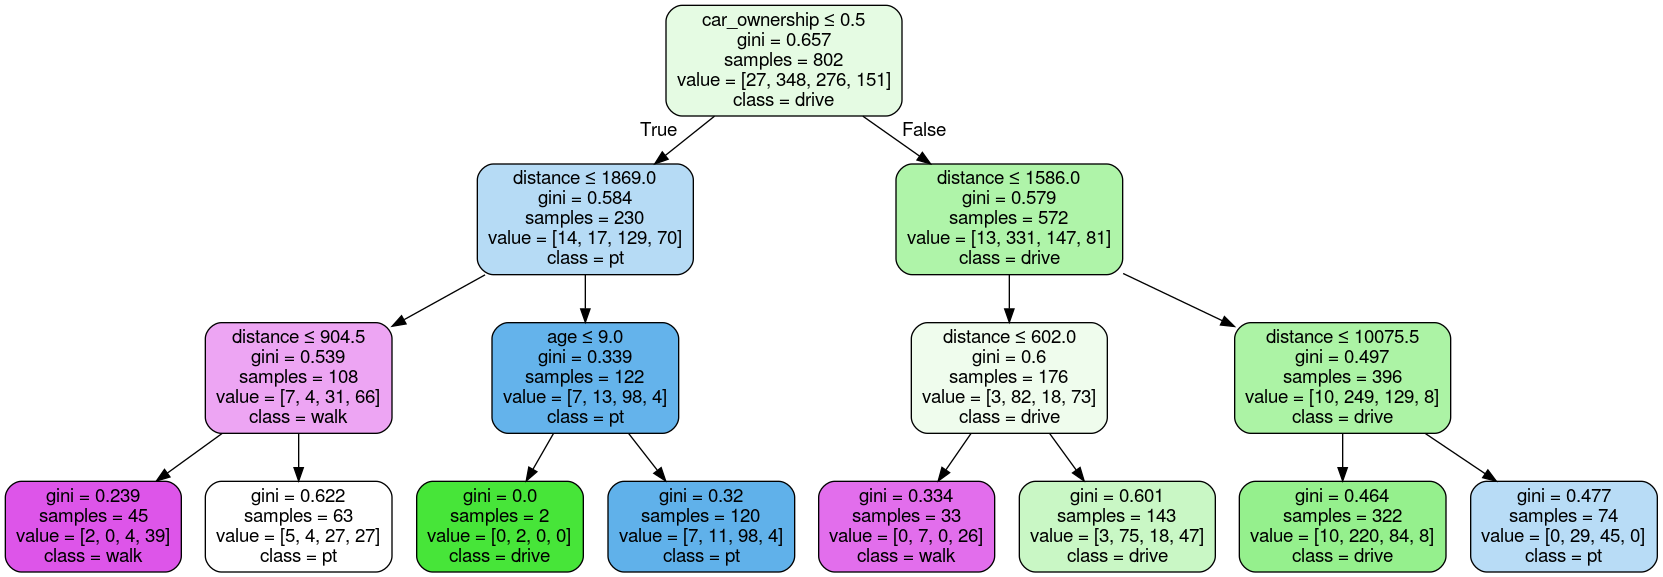

In [202]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['age', 'car_ownership', 'distance', 'female'],
                class_names = np.unique(y))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img = Image(graph.create_png())
display(img)

# Find best parameters

In [217]:
max_depth = list(np.arange(1, 11))
max_depth.append(None)

min_samples_split = np.arange(0.05, 1.05, 0.05)

min_samples_leaf = np.arange(0.05, 0.55, 0.05)

max_features = np.arange(1, 5)

accuracies = []

rnd = 123

clf = tree.DecisionTreeClassifier(random_state = rnd)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
base_accuracy = compute_accuracy(y_test, y_pred)

for m_depth in max_depth:
    for m_samp_split in min_samples_split:
        for m_samp_leaf in min_samples_leaf:
            for max_feat in max_features:
                
                if m_samp_split > 1:
                    m_samp_split = 1
                                
                clf = tree.DecisionTreeClassifier(
                    max_depth = m_depth,
                    min_samples_split = m_samp_split,
                    min_samples_leaf = m_samp_leaf,
                    max_features = max_feat,
                    random_state = rnd)
                
                clf = clf.fit(x_train, y_train)
                y_pred = clf.predict(x_test)
                accuracy = compute_accuracy(y_test, y_pred)
                
                accuracies.append(
                    {'acc': accuracy, 
                     'params': [m_depth, m_samp_split, m_samp_leaf, max_feat]
                    })


In [218]:
seq = [x['acc'] for x in accuracies]
print("Best accuracy: {:.2f}%".format(np.max(seq)))
print("With parameters: {}".format(accuracies[np.argmax(seq)]['params']))

Best accuracy: 69.19%
With parameters: [3, 0.15000000000000002, 0.05, 4]


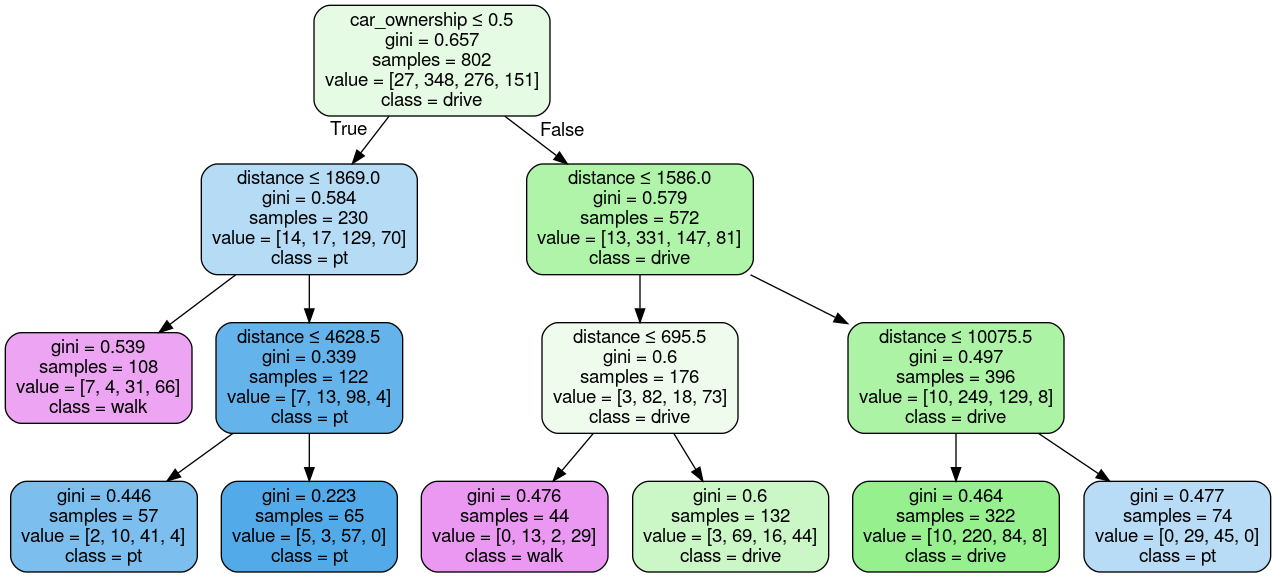

In [219]:
params = accuracies[np.argmax(seq)]['params']

clf = tree.DecisionTreeClassifier(max_depth=params[0],
                                 min_samples_split = params[1],
                                 min_samples_leaf = params[2],
                                 max_features = params[3],
                                 random_state = rnd)
clf = clf.fit(x_train, y_train)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['age', 'car_ownership', 'distance', 'female'],
                class_names = np.unique(y))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img = Image(graph.create_png())
display(img)